In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data
# mnist 데이터를 불러오기 ( 웹에서 바로 받기))


In [13]:
# 학습시키기 위한 tensorflow 세팅
# MNIST data는 총 28*28 총 784개의 픽셀로 구성
# one_hot encoding 
mnist = input_data.read_data_sets('MNIST_data/', one_hot= True)

X = tf.placeholder(tf.float32, [None, 784])
nb_classes = 10 # 총 우리가 원하는 예측변수 갯수( 0 ~ 9)
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
# multiclass logistic regression - 2개 이상의 반응 변수 (softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 모델 평가 (tf.equal은 sess.run과 같은 기능)
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))



In [17]:
# Training poch/batch / k-fold cross validation 과 같은건가?

training_epochs = 15  # epoch는 데이터를 한번 돌리는 것 (총 15번) 
batch_size = 100   # 한번 돌릴 때의 데이터 사이즈 (100개의 데이터)

wtraining_epochs = 15
batch_size = 100

with tf.Session():
    sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], 
                                       feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 
                                'cost =', '{:.9f}'.format(avg_cost))



NameError: name 'sess' is not defined

In [8]:
# 테스트데이터로 성능 평가
print("Accuracy: ", accuracy.eval(session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


NameError: name 'sess' is not defined

In [9]:


# 숫자 하나를 랜덤하게 불러와 예측값과 맞는지 확인
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), 
                      feed_dict={X: mnist.test.images[r:r + 1]}))

# 이미지로 확인
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


NameError: name 'sess' is not defined

Label: [7]
Prediction: [7]


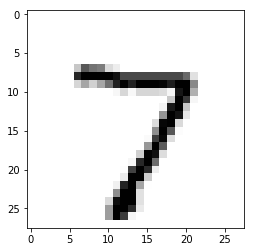

Label: [2]
Prediction: [2]


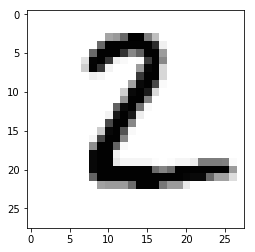

Label: [1]
Prediction: [1]


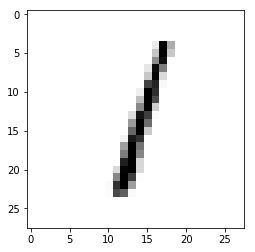

Label: [0]
Prediction: [0]


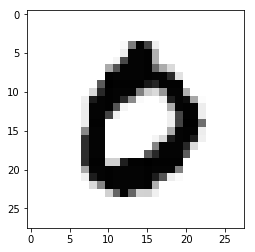

Label: [4]
Prediction: [4]


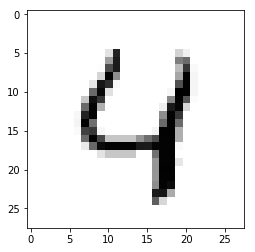

Label: [1]
Prediction: [1]


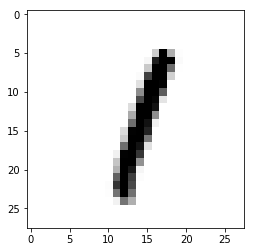

Label: [4]
Prediction: [4]


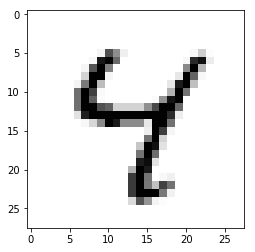

Label: [9]
Prediction: [9]


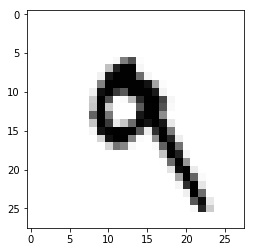

Label: [5]
Prediction: [6]


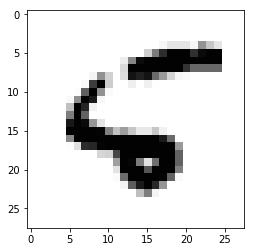

In [22]:
for i in range(0,9):
    print("Label:", sess.run(tf.argmax(mnist.test.labels[i:i+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), 
                      feed_dict={X: mnist.test.images[i:i + 1]}))

# 이미지로 확인
    plt.imshow(mnist.test.images[i:i + 1].
              reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()